# Regular Genomics Project **RNA Localisation**


In [15]:
from plotting import plot_line_graph, multiplot_pearson
from metrics import Pearson
from models import CNN
from utils import prepare_data, set_variables
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping

### **1.** Data Preparation

Firstly, we import several necessary packages and load in our data:

In [16]:
train_data, valid_data, test_data = prepare_data()

### **2** |  Initializations

We use as baseline model the [RNATracker](https://github.com/HarveyYan/RNATracker/blob/master/Models/cnn_bilstm_attention.py) model and a CNN model.


In [17]:
max_seq_len = train_data['seq'].apply(lambda x: len(x)).max()
model_name = 'CNN_Baseline_4Conv_Struct_ext'
model_architecture_path, model_output_path, params_dataLoader_train, params_dataLoader_valid, params_model, params_train = set_variables(model_name, max_seq_len)

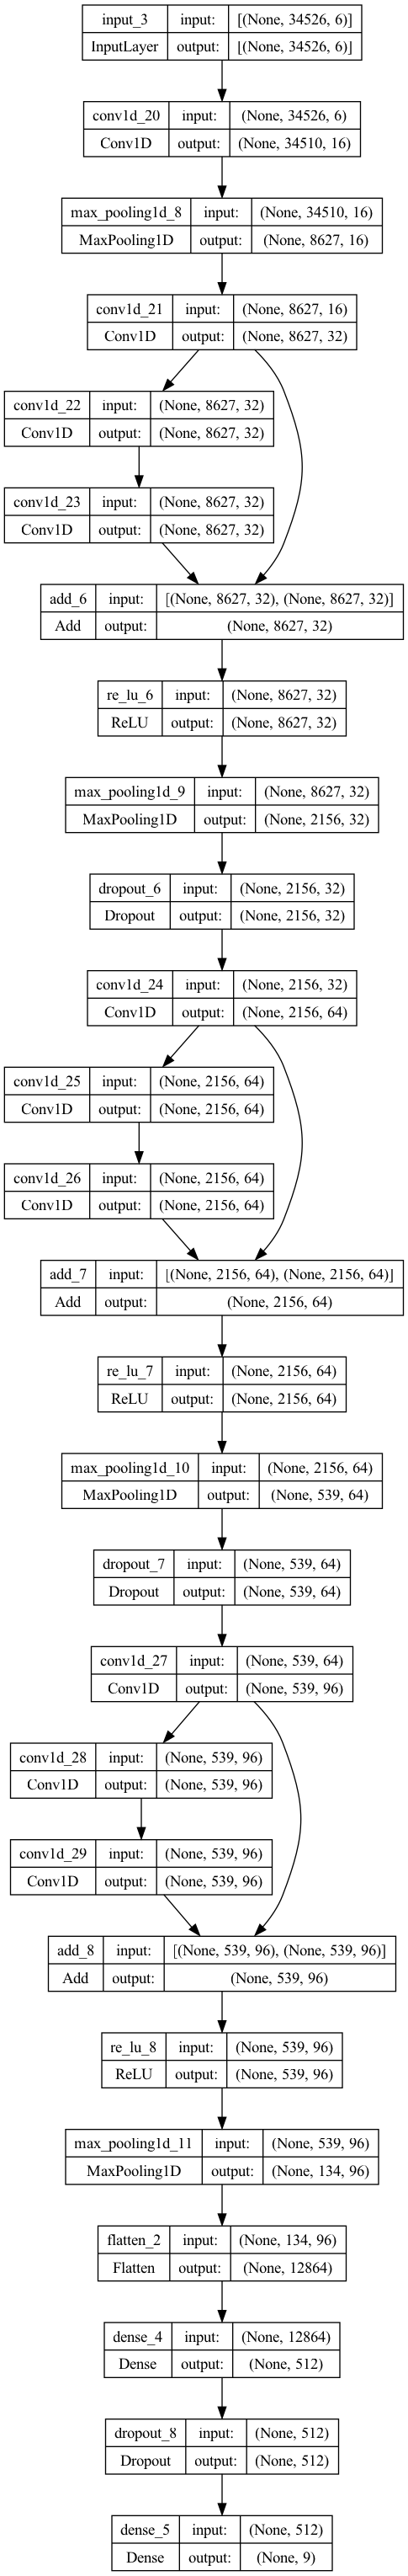

In [18]:
model = CNN(input_size=(max_seq_len, 6),
            params_model=params_model,
            metrics=[Pearson(return_dict=True)]
            )

model.print_model()
# model.summary() #if information about number of params needed

In [19]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 34526, 6)]           0         []                            
                                                                                                  
 conv1d_20 (Conv1D)          (None, 34510, 16)            1648      ['input_3[0][0]']             
                                                                                                  
 max_pooling1d_8 (MaxPoolin  (None, 8627, 16)             0         ['conv1d_20[0][0]']           
 g1D)                                                                                             
                                                                                                  
 conv1d_21 (Conv1D)          (None, 8627, 32)             544       ['max_pooling1d_8[0][0]'

In [23]:
history = model.fit_and_evaluate(train_data=train_data, eval_data=valid_data,
                                 params_train_dataLoader=params_dataLoader_train,
                                 params_eval_dataLoader=params_dataLoader_valid,
                                 params_train=params_train,
                                 callback=[EarlyStopping(monitor='loss', patience=3)])

Epoch 1/100
311/311 [==============================] - 205s 626ms/step - loss: 2.1368 - ERM: 0.5498 - KDEL: 0.4377 - LMA: 0.3877 - MITO: 0.3073 - NES: 0.3341 - NIK: 0.4611 - NLS: 0.3722 - NUCP: 0.4177 - OMM: 0.3611 - val_loss: 2.1686 - val_ERM: -0.0437 - val_KDEL: 0.4807 - val_LMA: 0.0729 - val_MITO: 0.1961 - val_NES: 0.2667 - val_NIK: 0.2704 - val_NLS: 0.2393 - val_NUCP: 0.0852 - val_OMM: 0.1490
Epoch 2/100
311/311 [==============================] - 207s 635ms/step - loss: 2.1359 - ERM: 0.5612 - KDEL: 0.4530 - LMA: 0.4027 - MITO: 0.3255 - NES: 0.3304 - NIK: 0.4537 - NLS: 0.3896 - NUCP: 0.4076 - OMM: 0.3729 - val_loss: 2.1698 - val_ERM: 0.0016 - val_KDEL: 0.4645 - val_LMA: 0.2064 - val_MITO: 0.2307 - val_NES: 0.2091 - val_NIK: 0.2697 - val_NLS: 0.3648 - val_NUCP: 0.1670 - val_OMM: -0.2156
Epoch 3/100
311/311 [==============================] - 201s 617ms/step - loss: 2.1353 - ERM: 0.5577 - KDEL: 0.4435 - LMA: 0.4021 - MITO: 0.3248 - NES: 0.3450 - NIK: 0.4552 - NLS: 0.4101 - NUCP: 0.4144

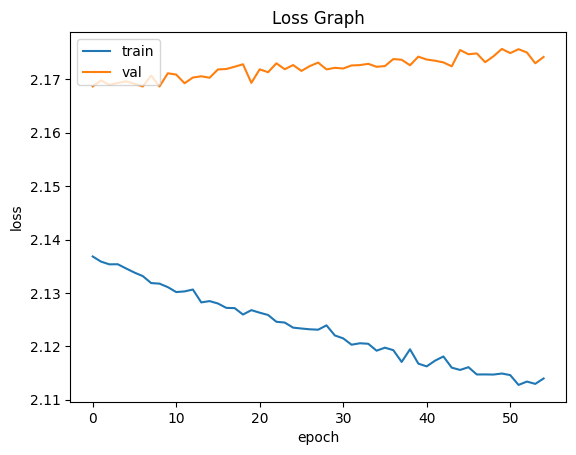

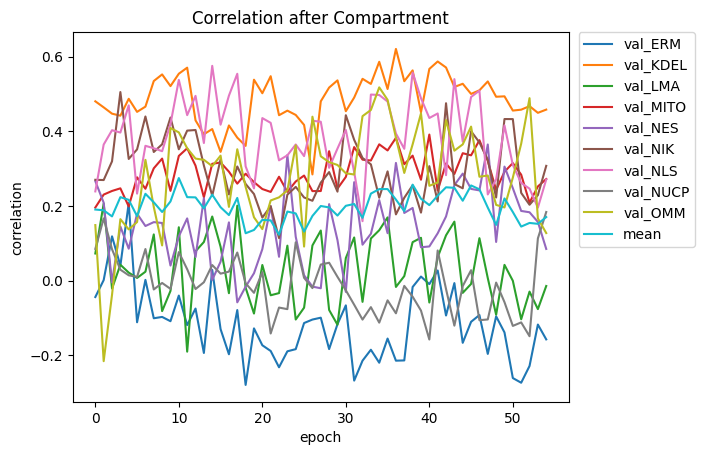

In [24]:
plt_data = [history.history['loss'], history.history['val_loss']]
plot_line_graph(plt_data, "Loss Graph", 'loss', 'epoch', ['train', 'val'])

multiplot_pearson(history.history)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

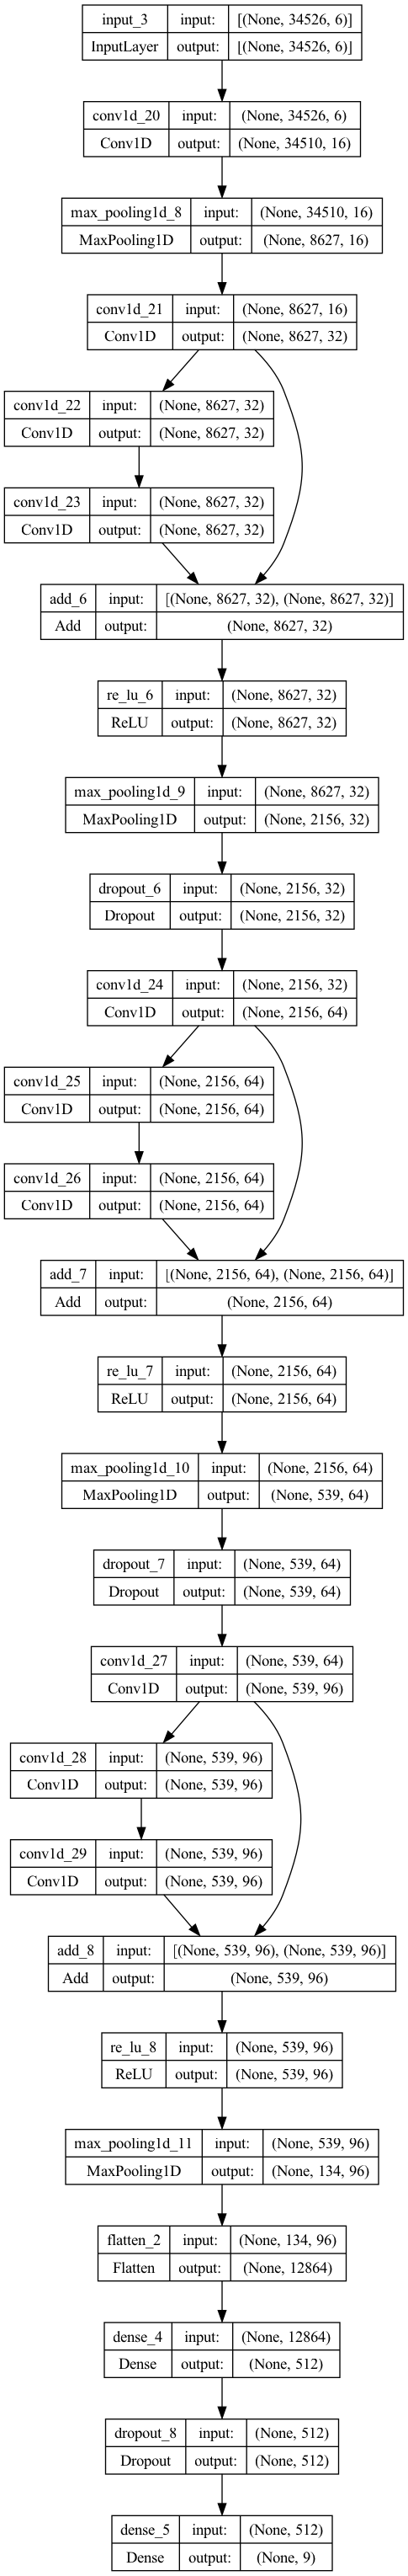

In [25]:
model.print_model(model_architecture_path)
#model.save_model(model_output_path)

In [26]:
model.save_model(model_output_path)